In [28]:
import matplotlib.pyplot as plt

import numpy as np 
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])


In [29]:
counts = {}
for label in np.unique(y):
# itera sobre cada una de las clases 
# identifica los arrayz que inicion con el 0 o con el 1 y los suma entre si y los guarda en la clase respectiva 
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))


Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


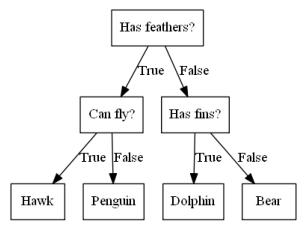

In [30]:

import mglearn

mglearn.plots.plot_animal_tree()

# Cáncer de mama.
hacer crecer el árbol hasta
todas las hojas son puras

In [45]:
import pandas as pd
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Precisión en el conjunto de entrenamiento: {:.3f}".format(tree.score(X_train, y_train)))
print("Precisión en el equipo de prueba: {:.3f}".format(tree.score(X_test, y_test)))
#Por lo tanto, los árboles sin podar son propensos a sobreajustar y no generalizar.
#así a nuevos datos.

Precisión en el conjunto de entrenamiento: 1.000
Precisión en el equipo de prueba: 0.937


In [46]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [47]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

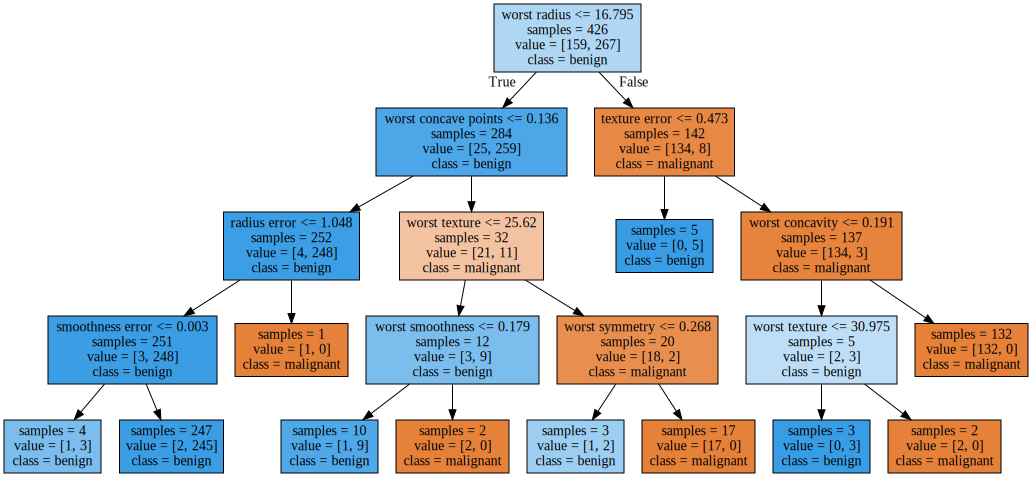

In [48]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

In [49]:
print("Feature importances:\n{}".format(tree.feature_importances_))


Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


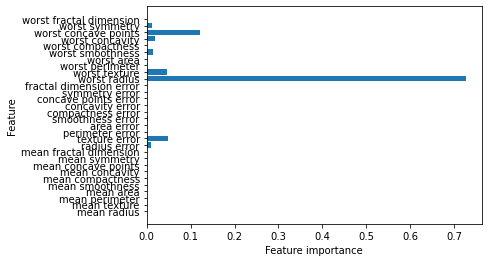

In [36]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


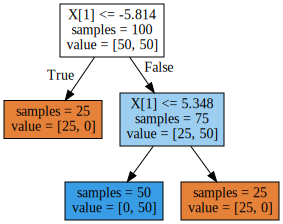

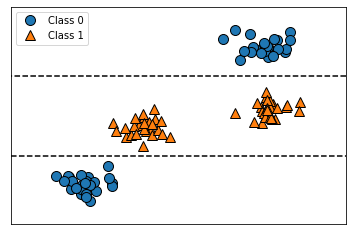

In [37]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

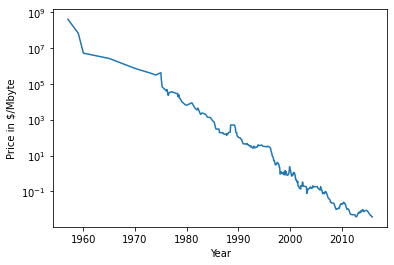

In [38]:
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = np.reshape(data_train.date.values, (-1, 1))
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree       = DecisionTreeRegressor(max_depth=None).fit(X_train, y_train)
#tree       = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = np.reshape(ram_prices.date.values, (-1, 1))

pred_tree = tree.predict(X_all)
pred_lr   = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr   = np.exp(pred_lr)


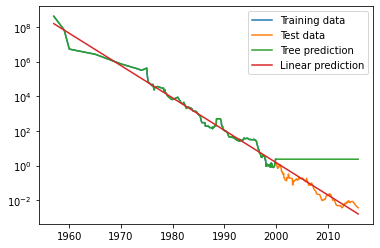

In [40]:

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

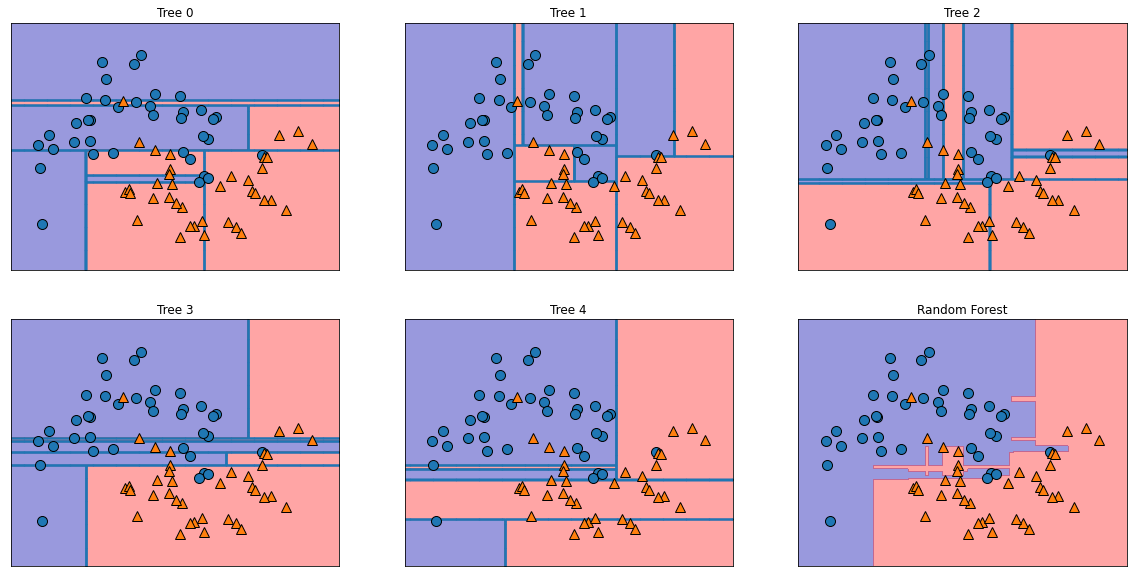

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
 ax.set_title("Tree {}".format(i))
 mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


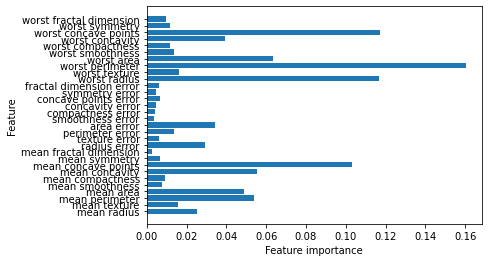

In [44]:
plot_feature_importances_cancer(forest)